# 4.10 Task _ Part 1

### Table of Content

### Q1: Import the data set

### Q2:  Address PII data

### Q3: Create a regional segmentation of the data to compare customer behavior in different geographic areas

### Q4:Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data.

### Q5:  Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents.

### Q6: Create an appropriate visualization to show the distribution of profiles.

### Q7: Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure

### Q8:Compare customer profiles with regions and departments

In [1]:
## Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy

In [2]:
## Create path
path=r'C:\Users\inesh\Instacart Basket Analysis_01_02_2024'


## Q1: Import final data set of 4.9 Task

In [3]:
instacart_merge=pd.read_pickle(os.path.join(path,'02 Data','Prepared Data','Prepared pkl files','instacart_ords_prods_customer_merge.pkl'))

In [4]:
instacart_merge.shape

(32404859, 35)

In [5]:
instacart_merge.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_from_last_order,product_id,add_to_cart_order,reordered,Unnamed: 0,...,first_name,last_name,gender,state,age,date_joined,dependant_no,family_status,income,_merge
0,2539329,1,1,2,8,NaN,196,1,0,195,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
1,2398795,1,2,3,7,15.0,196,1,1,195,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
2,473747,1,3,3,12,21.0,196,1,1,195,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
3,2254736,1,4,4,7,29.0,196,1,1,195,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
4,431534,1,5,4,15,28.0,196,1,1,195,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both


In [6]:
instacart_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32404859 entries, 0 to 32404858
Data columns (total 35 columns):
 #   Column                 Dtype   
---  ------                 -----   
 0   order_id               int64   
 1   user_id                int64   
 2   order_number           int64   
 3   orders_day_of_week     int64   
 4   order_hour_of_day      int64   
 5   days_from_last_order   float64 
 6   product_id             int64   
 7   add_to_cart_order      int64   
 8   reordered              int64   
 9   Unnamed: 0             int64   
 10  product_name           object  
 11  aisle_id               int64   
 12  department_id          int64   
 13  prices                 float64 
 14  merge_indicator        category
 15  price_range_loc        object  
 16  busiest_day            object  
 17  busiest_days           object  
 18  busiest_period_of_day  object  
 19  max_order              int64   
 20  loyalty_flag           object  
 21  average_spending       float6

## Q2: PII Data

In [7]:
df_customer=pd.read_csv(r'C:\Users\inesh\Instacart Basket Analysis_01_02_2024\02 Data\Original Data\customers.csv')

In [8]:
df_customer.columns

Index(['user_id', 'First Name', 'Surnam', 'Gender', 'STATE', 'Age',
       'date_joined', 'n_dependants', 'fam_status', 'income'],
      dtype='object')

### There are PII data in the instacart_merge data set. especially in customer data set. This customer data set could be used to trace back to a particular person. As an example, a customer's full name, gender, age & state information can be used as a combination to aim a person.  However, this customer data set is an artificially created data set to use in this exercise. Therefore it is ok to publish this data by indicating that in reports. 

## Q3: Create a regional segmentation of the data to compare customer behavior in different geographic areas

### Create region column

In [9]:
## Create regional segments

result = []

for value in instacart_merge['state']:
    if value in ('Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 
                 'Pennsylvania', 'New Jersey'):
        result.append('Northeast')
        
    elif value in ('Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota' , 'South Dakota', 'Nebraska', 
                   'Kansas', 'Minnesota', 'Iowa', 'Missouri'):
        result.append('Midwest')
        
    elif value in ('Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 
                   'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 
                   'Oklahoma', 'Texas', 'Arkansas', 'Louisiana'):
        result.append('South')
        
    elif value in ('Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 
                   'Washington', 'Oregon', 'California', 'Hawaii'):
        result.append('West')
        
    else:
        result.append('Unknown') 

In [10]:
##create a new column for region

instacart_merge['region'] = result


In [11]:
instacart_merge['region']

0           South
1           South
2           South
3           South
4           South
            ...  
32404854     West
32404855    South
32404856    South
32404857    South
32404858    South
Name: region, Length: 32404859, dtype: object

In [12]:
grouped_data = instacart_merge.groupby(['state', 'region']).size().reset_index

In [13]:
print(grouped_data)

<bound method Series.reset_index of state                 region   
Alabama               South        638003
Alaska                West         648495
Arizona               West         653964
Arkansas              South        636144
California            West         659783
Colorado              West         639280
Connecticut           Northeast    623022
Delaware              South        637024
District of Columbia  South        613695
Florida               South        629027
Georgia               South        656389
Hawaii                West         632901
Idaho                 West         607119
Illinois              Midwest      633024
Indiana               Midwest      627282
Iowa                  Midwest      625493
Kansas                Midwest      637538
Kentucky              South        632490
Louisiana             South        637482
Maine                 Northeast    638583
Maryland              South        626579
Massachusetts         Northeast    646358
Michigan

In [14]:
instacart_merge['region'].value_counts(dropna = False)

region
South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: count, dtype: int64

### Determine whether there’s a difference in spending habits between the different U.S. regions

In [15]:
instacart_merge['spending flag'].value_counts(dropna = False)

spending flag
Low spender     31770614
High spender      634245
Name: count, dtype: int64

In [16]:
grouped_data = instacart_merge.groupby(['region','spending flag']).size().reset_index(name='count')
print(grouped_data)

      region spending flag     count
0    Midwest  High spender    155975
1    Midwest   Low spender   7441350
2  Northeast  High spender    108225
3  Northeast   Low spender   5614511
4      South  High spender    209691
5      South   Low spender  10582194
6       West  High spender    160354
7       West   Low spender   8132559


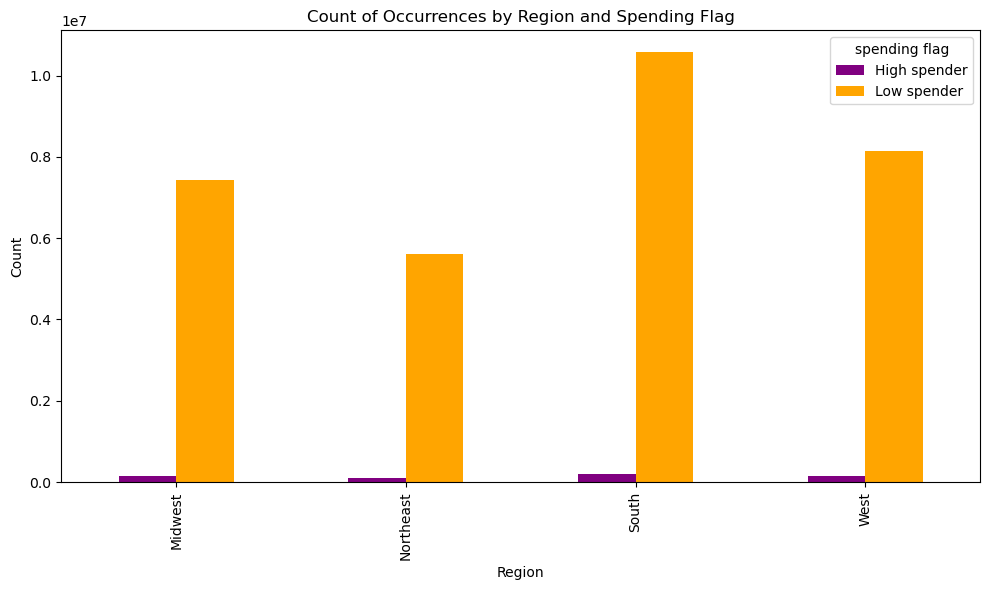

In [17]:
# Create bar chart to show the difference in spending habits between the different U.S. regions

# Define colors for each spending flag
colors = ['purple', 'orange']

# Group the data by both 'region' and 'spending flag' columns and compute the count of occurrences
grouped_data = instacart_merge.groupby(['region', 'spending flag']).size().unstack()

# Create the bar plot
spending_habits_region_bar = grouped_data.plot.bar(color=colors, figsize=(10, 6))

# Set labels and title
spending_habits_region_bar.set_xlabel('Region')
spending_habits_region_bar.set_ylabel('Count')
spending_habits_region_bar.set_title('Count of Occurrences by Region and Spending Flag')

# Show plot
plt.tight_layout()
plt.show()


In [18]:
spending_habits_region_bar.figure.savefig(r'C:\Users\inesh\Instacart Basket Analysis_01_02_2024\04 Analysis\Visualizations\spebnding_habits_region_bar.png')

#### In every region, there are more Low spenders than high spenders. However, south region has highest *High spenders* out of all regions

## Q4: Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.

In [19]:
## Creting exclusion flag

instacart_merge['exclusion_flag'] = np.where(instacart_merge['max_order'] < 5, 'Exclude-low-activity customer', 'Keep')


In [20]:
instacart_merge['exclusion_flag'].value_counts(dropna=False)

exclusion_flag
Keep                             30964564
Exclude-low-activity customer     1440295
Name: count, dtype: int64

#### There are 1440295 customers with Exclude-low-activity customer flag

In [21]:
## Create a sample data set of 

instacart_low_activity_customers =instacart_merge[instacart_merge['exclusion_flag'] == 'Exclude-low-activity customer']

In [22]:
instacart_low_activity_customers.shape

(1440295, 37)

In [23]:
## Export a sample of Exclude-low-activity customer as csv file

instacart_low_activity_customers.to_csv(r'C:\Users\inesh\Instacart Basket Analysis_01_02_2024\04 Analysis\Test files\instacart_low_activity_customers.csv')

In [24]:
## Remove low_Activity customers from instacart_merge dataframe

instacart_merge_active_customers = instacart_merge[instacart_merge['exclusion_flag'] != 'Exclude-low-activity customer']


In [25]:
instacart_merge_active_customers.shape

(30964564, 37)

In [26]:
## Export the new data frame "instacart_merge_active_customers". 

instacart_merge_active_customers.to_pickle(r'C:\Users\inesh\Instacart Basket Analysis_01_02_2024\02 Data\Prepared Data\Prepared pkl files\instacart_merge_active_customers.pkl')

## Q5: Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents.

##### *Create customer profiles based on age*

## To avoid memory crash errors, from here onward I am working with "new_instacart_merge_active_customers" df which has dropped some columns of instacart_merge_active_customers

In [27]:
## Drop columns to avoid memory errors

# List of column names to drop
columns_to_drop = ['order_id', 'user_id', 'order_number','add_to_cart_order', 'reordered', 'Unnamed: 0', '_merge']

# Drop the columns from the DataFrame
new_instacart_merge_active_customers = instacart_merge_active_customers.drop(columns_to_drop, axis=1)



In [28]:
new_instacart_merge_active_customers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30964564 entries, 0 to 32404854
Data columns (total 30 columns):
 #   Column                 Dtype   
---  ------                 -----   
 0   orders_day_of_week     int64   
 1   order_hour_of_day      int64   
 2   days_from_last_order   float64 
 3   product_id             int64   
 4   product_name           object  
 5   aisle_id               int64   
 6   department_id          int64   
 7   prices                 float64 
 8   merge_indicator        category
 9   price_range_loc        object  
 10  busiest_day            object  
 11  busiest_days           object  
 12  busiest_period_of_day  object  
 13  max_order              int64   
 14  loyalty_flag           object  
 15  average_spending       float64 
 16  spending flag          object  
 17  frequency_of_purchase  float64 
 18  order frequency flag   object  
 19  first_name             object  
 20  last_name              object  
 21  gender                 object  
 2

##### *Create customer profiles based on age*

In [29]:
## Create customer profiles 

### Based on age

age_bins = [0, 30, 60, float('inf')]  # Define the age bins (e.g., 0-30, 31-60, 61 and above)
age_labels = ['Young Adult', 'Adult', 'Senior']  # Define the corresponding labels for each age range

# Create the 'age_flag' column using pd.cut()
new_instacart_merge_active_customers.loc[:, 'age_flag'] = pd.cut(new_instacart_merge_active_customers['age'], bins=age_bins, labels=age_labels, right=False)


In [30]:
new_instacart_merge_active_customers['age_flag'].value_counts(dropna=False)

age_flag
Adult          14572457
Senior         10574504
Young Adult     5817603
Name: count, dtype: int64

##### *Create customer profiles based on income*

In [31]:
new_instacart_merge_active_customers['income'].describe()

count    3.096456e+07
mean     9.967587e+04
std      4.314187e+04
min      2.590300e+04
25%      6.729200e+04
50%      9.676500e+04
75%      1.281020e+05
max      5.939010e+05
Name: income, dtype: float64

In [32]:
## based on income quartiles

income_thresholds = [67292, 96765, 128102]  # 25%, 50%, and 75% quartiles

# Define labels for income ranges
income_labels = ['Low', 'Middle', 'High']

#  Assign income range labels

def assign_income_range(income):
    if income <= income_thresholds[0]:
        return income_labels[0]  # Low income
    elif income <= income_thresholds[1]:
        return income_labels[1]  # Middle income
    else:
        return income_labels[2]  # High income


# Create the 'income_range' column using the function
new_instacart_merge_active_customers['income_range'] = new_instacart_merge_active_customers['income'].apply(assign_income_range)

In [33]:
new_instacart_merge_active_customers['income_range'].value_counts(dropna=False)

income_range
High      15481973
Low        7741348
Middle     7741243
Name: count, dtype: int64

##### Create customer profile based on family_status

In [34]:
new_instacart_merge_active_customers['family_status'].value_counts(dropna=False)

family_status
married                             21743711
single                               5094410
divorced/widowed                     2645271
living with parents and siblings     1481172
Name: count, dtype: int64

In [35]:
# Map for family status flags
family_status_mapping = {
    'married': 'married',
    'single': 'single',
    'divorced/widowed': 'divorced/widowed',
    'living with parents and siblings': 'single_living_with_parents_and_siblings'
}

# Map family status to flags using the mapping dictionary
new_instacart_merge_active_customers['family_status_flag'] = new_instacart_merge_active_customers['family_status'].map(family_status_mapping)

# Display the DataFrame with the new 'family_status_flag' column


In [36]:
new_instacart_merge_active_customers['family_status_flag'].value_counts(dropna=False)

family_status_flag
married                                    21743711
single                                      5094410
divorced/widowed                            2645271
single_living_with_parents_and_siblings     1481172
Name: count, dtype: int64

##### Create Customer Profile using 'age_flag', 'income_range', and 'family_status_flag',

In [37]:
# Convert Categorical columns to strings before concatenation
new_instacart_merge_active_customers['age_flag'] = new_instacart_merge_active_customers['age_flag'].astype(str)
new_instacart_merge_active_customers['income_range'] = new_instacart_merge_active_customers['income_range'].astype(str)
new_instacart_merge_active_customers['family_status_flag'] = new_instacart_merge_active_customers['family_status_flag'].astype(str)

# Concatenate 'age_flag', 'income_range', and 'family_status_flag' columns to create 'customer_profile'
new_instacart_merge_active_customers['customer_profile'] = new_instacart_merge_active_customers['age_flag'] + '_' + new_instacart_merge_active_customers['income_range'] + '_' + new_instacart_merge_active_customers['family_status_flag']



In [38]:
new_instacart_merge_active_customers['customer_profile'].value_counts(dropna=False)

customer_profile
Senior_High_married                                           5830069
Adult_High_married                                            5425474
Adult_Low_married                                             2764918
Adult_Middle_married                                          2735273
Senior_High_divorced/widowed                                  1951774
Adult_High_single                                             1828487
Young Adult_Low_married                                       1353593
Young Adult_Middle_married                                    1311798
Senior_Middle_married                                         1070966
Senior_Low_married                                            1028198
Adult_Low_single                                               933394
Adult_Middle_single                                            884911
Young Adult_Middle_single_living_with_parents_and_siblings     704803
Young Adult_Middle_single                                      671137
You

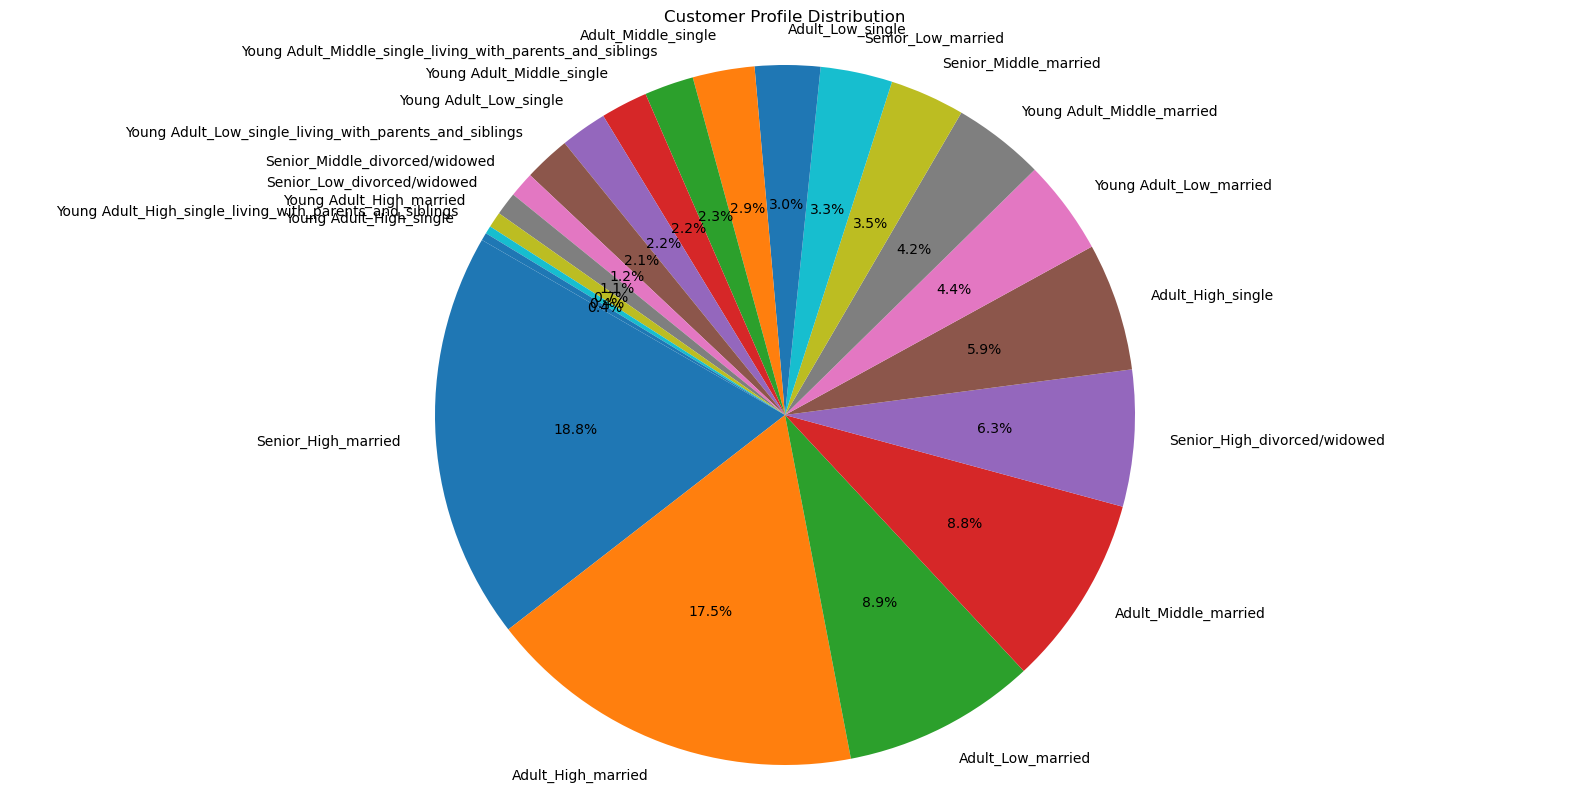

In [39]:

# Count the occurrences of each unique value in the 'customer_profile' column
profile_counts = new_instacart_merge_active_customers['customer_profile'].value_counts()

# Plot the pie chart
plt.figure(figsize=(20, 10))
plt.pie(profile_counts, labels=profile_counts.index, autopct='%1.1f%%', startangle=150)
plt.title('Customer Profile Distribution')
plt.axis('equal')  

# Define the file path to save the pie chart
file_path = r'\Users\inesh\Instacart Basket Analysis_01_02_2024\04 Analysis\Visualizations\cust_profile.png'

# Save the pie chart 
plt.savefig(file_path)
plt.show()

#### Profiling customers on family_status_flag and there order patterns during hours of the day by grouping


In [40]:
hourly_order_counts_by_family_status = new_instacart_merge_active_customers.groupby('family_status_flag')['order_hour_of_day'].value_counts().unstack()

In [41]:
hourly_order_counts_by_family_status

order_hour_of_day,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
family_status_flag,,,,,,,,,,,,,,,,,,,,,
divorced/widowed,16150,8582,6174,4443,3997,7774,23577,77304,142533,199662,...,219032,216572,207995,168536,130188,104313,81476,66363,52060,33368
married,145951,77334,45470,33885,35764,58797,195277,600913,1167336,1663228,...,1805333,1777933,1687460,1390257,1094662,836898,652677,536579,423754,267006
single,35284,18149,10558,7932,8208,13510,47293,142767,273414,390122,...,420831,420203,402459,327758,251912,195020,153102,124618,102266,65453
single_living_with_parents_and_siblings,10657,5556,3489,2536,2794,4337,14866,42229,75827,110599,...,122707,121258,115767,95794,74422,57647,43654,35551,28980,18727


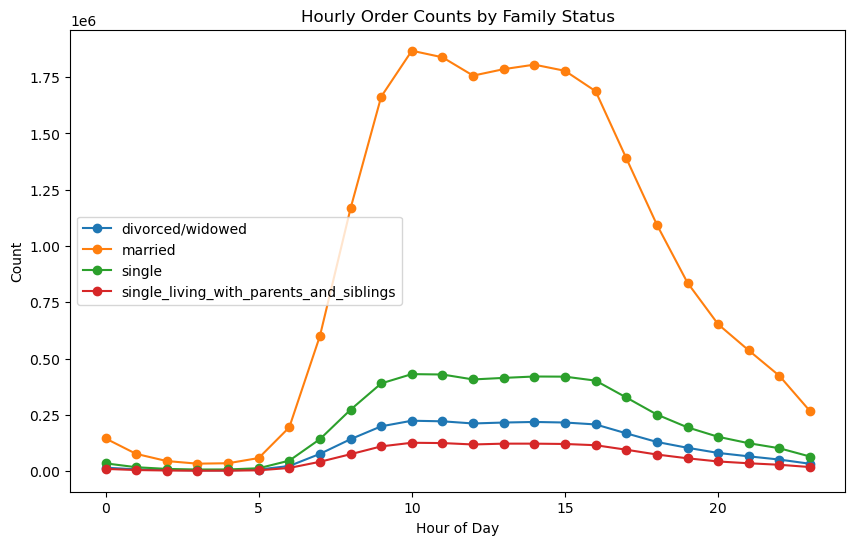

In [42]:
import matplotlib.pyplot as plt
import os

# Creating a line chart for visualization with for loop
fig, ax = plt.subplots(figsize=(10, 6))
for family_status in hourly_order_counts_by_family_status.index:
    ax.plot(hourly_order_counts_by_family_status.columns, hourly_order_counts_by_family_status.loc[family_status], label=family_status, marker='o')

# Customizing the chart 
ax.set_xlabel('Hour of Day')
ax.set_ylabel('Count')
ax.set_title('Hourly Order Counts by Family Status')
ax.legend()

# Define the save path
save_path = r'C:\Users\inesh\Instacart Basket Analysis_01_02_2024\04 Analysis\Visualizations'
file_path = os.path.join(save_path, 'Hourly Order Counts by Family Status.png')

# Save the figure directly
fig.savefig(file_path)


##### According to this chart it is clear that most ordered have been made by married customers at 6 a.m ordering rate start climbing and reaching the peak at 11 a.m then stabalize  and start decline at 4 p.m

In [43]:
orders_day_of_week_counts_by_family_status = new_instacart_merge_active_customers.groupby('family_status_flag')['orders_day_of_week'].value_counts().unstack()

In [44]:
orders_day_of_week_counts_by_family_status

orders_day_of_week,0,1,2,3,4,5,6
family_status_flag,,,,,,,
divorced/widowed,502506,459198,343839,315320,306704,348434,369270
married,4150704,3789854,2829759,2578075,2546521,2824095,3024703
single,974572,903152,658742,601722,598555,665740,691927
single_living_with_parents_and_siblings,280828,259482,192366,174418,173214,195460,205404


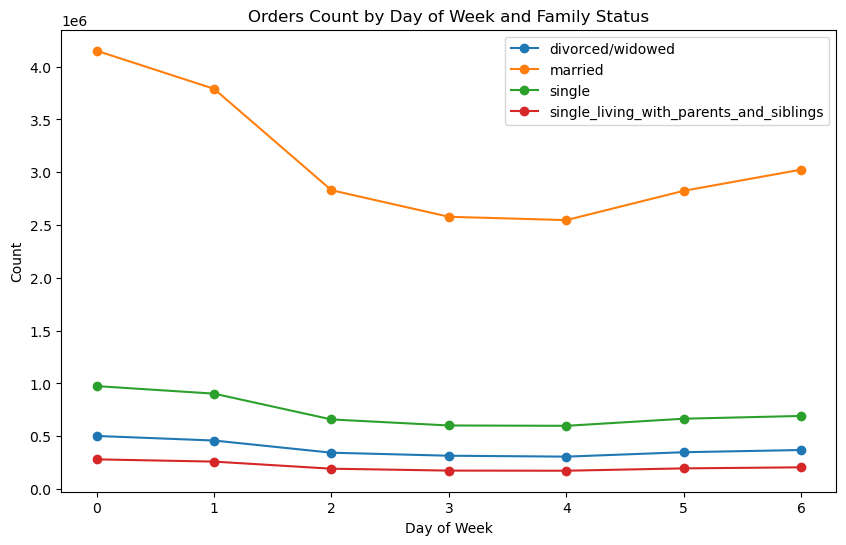

In [45]:

# Creating a line chart for visualization with for loop
fig, ax = plt.subplots(figsize=(10, 6))
for family_status in orders_day_of_week_counts_by_family_status.index:
    ax.plot(orders_day_of_week_counts_by_family_status.columns, orders_day_of_week_counts_by_family_status.loc[family_status], label=family_status, marker='o')

# Customizing the chart 
ax.set_xlabel('Day of Week')
ax.set_ylabel('Count')
ax.set_title('Orders Count by Day of Week and Family Status')
ax.legend()

# Define the save path
save_path = r'C:\Users\inesh\Instacart Basket Analysis_01_02_2024\04 Analysis\Visualizations'
file_path = os.path.join(save_path, 'Orders Count by Day of Week and Family Status.png')

# Save the figure directly
fig.savefig(file_path)


#### Top_department_by_customer_profile

In [46]:
top_department_by_customer_profile = (new_instacart_merge_active_customers.groupby('customer_profile')['department_id']
                    .apply(lambda x: x.value_counts().nlargest(3).index.tolist())
                    .reset_index(name='top_department_ids'))

In [47]:
top_department_by_customer_profile

,customer_profile,top_department_ids
0,Adult_High_married,"[4, 16, 7]"
1,Adult_High_single,"[4, 16, 7]"
2,Adult_Low_married,"[4, 16, 19]"
3,Adult_Low_single,"[4, 16, 19]"
4,Adult_Middle_married,"[4, 16, 19]"
5,Adult_Middle_single,"[4, 16, 7]"
6,Senior_High_divorced/widowed,"[4, 16, 7]"
7,Senior_High_married,"[4, 16, 7]"
8,Senior_Low_divorced/widowed,"[4, 19, 16]"
9,Senior_Low_married,"[4, 19, 16]"


## Q6: Create an appropriate visualization to show the distribution of profiles

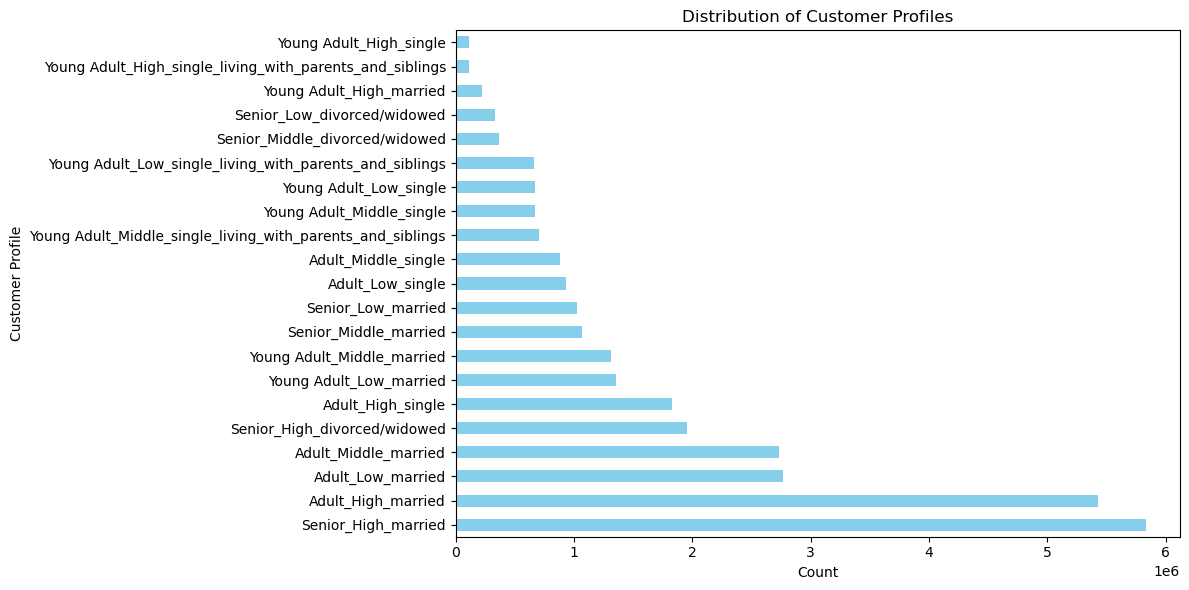

In [48]:
customer_profile_counts = new_instacart_merge_active_customers['customer_profile'].value_counts()

plt.figure(figsize=(12, 6))
customer_profile_counts.plot(kind='barh', color='skyblue')
plt.xlabel('Count')
plt.ylabel('Customer Profile')
plt.title('Distribution of Customer Profiles')
plt.tight_layout()

# Define the file path to save the pie chart
file_path = r'\Users\inesh\Instacart Basket Analysis_01_02_2024\04 Analysis\Visualizations\customer_profile.png'

# Save the pie chart to the specified directory
plt.savefig(file_path)
plt.show()

## Q:7 Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure

In [49]:
customer_profile_expenditure =new_instacart_merge_active_customers.groupby('customer_profile').agg({'prices':['sum', 'mean', 'min', 'max']})

In [50]:
customer_profile_expenditure

prices             \
                                                           sum       mean   
customer_profile                                                            
Adult_High_married                                  85550027.9  15.768213   
Adult_High_single                                   30971278.0  16.938200   
Adult_Low_married                                   20233875.0   7.318074   
Adult_Low_single                                     6838436.9   7.326420   
Adult_Middle_married                                23831728.9   8.712742   
Adult_Middle_single                                  7143545.9   8.072615   
Senior_High_divorced/widowed                        25071879.4  12.845688   
Senior_High_married                                 77075090.0  13.220271   
Senior_Low_divorced/widowed                          2225980.8   6.722134   
Senior_Low_married                                   6900287.1   6.711049   
Senior_Middle_divorced/widowed                       3209364.3   8.856962   
Senior_Middle_married                                9497636.2   8.868289   
Young Adult_High_married                            14291086.7  63.964546   
Young Adult_High_single                              7513778.8  68.050345   
Young Adult_High_single_living_with_parents_and...   5063970.2  45.080388   
Young Adult_Low_married                             10297750.1   7.607715   
Young Adult_Low_single                               5048297.6   7.579275   
Young Adult_Low_single_living_with_parents_and_...   5045257.4   7.597856   
Young Adult_Middle_married                          12037882.9   9.176628   
Young Adult_Middle_single                            5648144.0   8.415784   
Young Adult_Middle_single_living_with_parents_a...   6020983.5   8.542789   

                                                                  
                                                    min      max  
customer_profile                                                  
Adult_High_married                                  1.0  99999.0  
Adult_High_single                                   1.0  99999.0  
Adult_Low_married                                   1.0  14900.0  
Adult_Low_single                                    1.0  14900.0  
Adult_Middle_married                                1.0  99999.0  
Adult_Middle_single                                 1.0  99999.0  
Senior_High_divorced/widowed                        1.0  99999.0  
Senior_High_married                                 1.0  99999.0  
Senior_Low_divorced/widowed                         1.0     25.0  
Senior_Low_married                                  1.0     25.0  
Senior_Middle_divorced/widowed                      1.0  99999.0  
Senior_Middle_married                               1.0  99999.0  
Young Adult_High_married                            1.0  99999.0  
Young Adult_High_single                             1.0  99999.0  
Young Adult_High_single_living_with_parents_and...  1.0  99999.0  
Young Adult_Low_married                             1.0  14900.0  
Young Adult_Low_single                              1.0     25.0  
Young Adult_Low_single_living_with_parents_and_...  1.0     25.0  
Young Adult_Middle_married                          1.0  99999.0  
Young Adult_Middle_single                           1.0  14900.0  
Young Adult_Middle_single_living_with_parents_a...  1.0  99999.0

## Q8: Compare customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important

In [51]:
region_departments_profile=new_instacart_merge_active_customers[['region', 'age_flag', 'income_range', 'family_status_flag','customer_profile']]

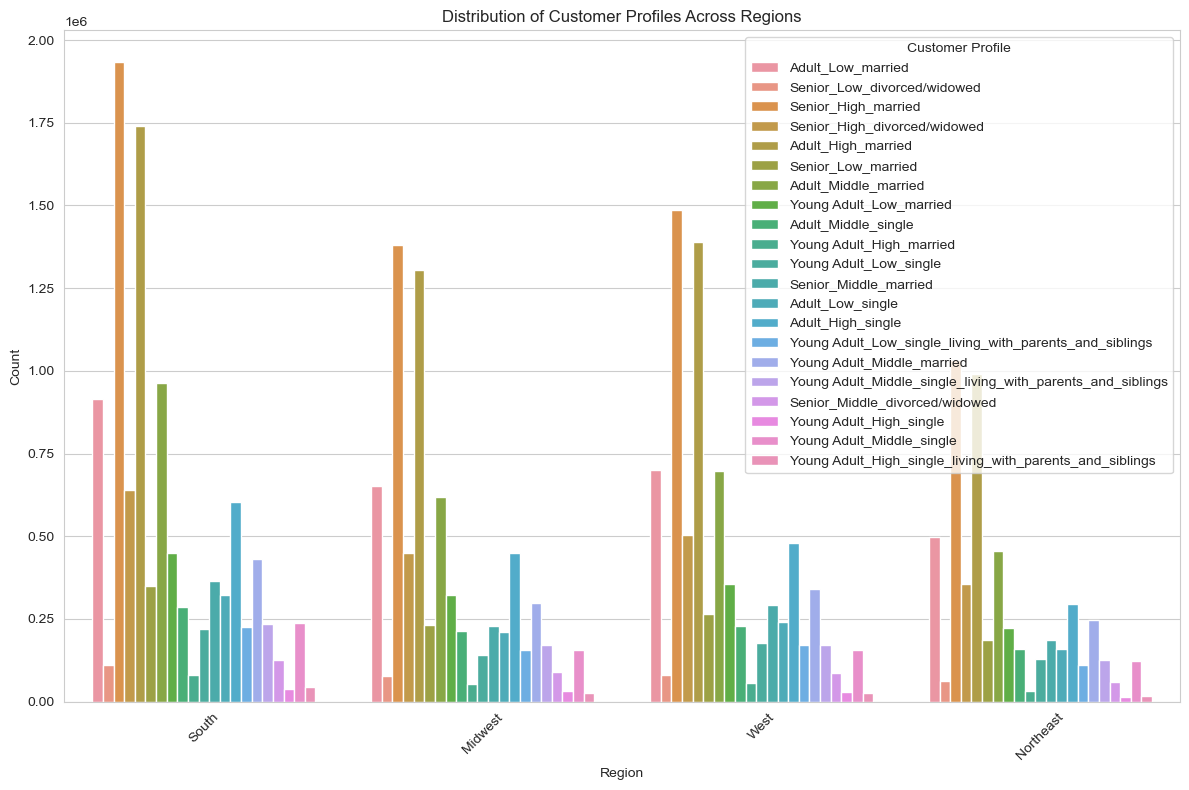

In [52]:

import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of seaborn
sns.set_style("whitegrid")

# Create the count plot
plt.figure(figsize=(12, 8))
sns.countplot(data=region_departments_profile, x='region', hue='customer_profile')
plt.title('Distribution of Customer Profiles Across Regions')
plt.xlabel('Region')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Customer Profile', loc='upper right')
plt.tight_layout()

# Define the file path to save the pie chart
file_path = r'\Users\inesh\Instacart Basket Analysis_01_02_2024\04 Analysis\Visualizations\departmentid_customer.png'

# Save the pie chart to the specified directory
plt.savefig(file_path)
plt.show()

# Show the plot
plt.show()


In [53]:
region_departments_profile

,region,age_flag,income_range,family_status_flag,customer_profile
0,South,Adult,Low,married,Adult_Low_married
1,South,Adult,Low,married,Adult_Low_married
2,South,Adult,Low,married,Adult_Low_married
3,South,Adult,Low,married,Adult_Low_married
4,South,Adult,Low,married,Adult_Low_married
...,...,...,...,...,...
32404850,West,Young Adult,Low,single,Young Adult_Low_single
32404851,West,Young Adult,Low,single,Young Adult_Low_single
32404852,West,Young Adult,Low,single,Young Adult_Low_single
32404853,West,Young Adult,Low,single,Young Adult_Low_single


In [54]:
departmentid_customer_profile =new_instacart_merge_active_customers[['department_id', 'prices', 'customer_profile']]

In [55]:
departmentid_customer_profile

,department_id,prices,customer_profile
0,7,9.0,Adult_Low_married
1,7,9.0,Adult_Low_married
2,7,9.0,Adult_Low_married
3,7,9.0,Adult_Low_married
4,7,9.0,Adult_Low_married
...,...,...,...
32404850,7,10.7,Young Adult_Low_single
32404851,7,10.7,Young Adult_Low_single
32404852,7,10.7,Young Adult_Low_single
32404853,7,10.7,Young Adult_Low_single


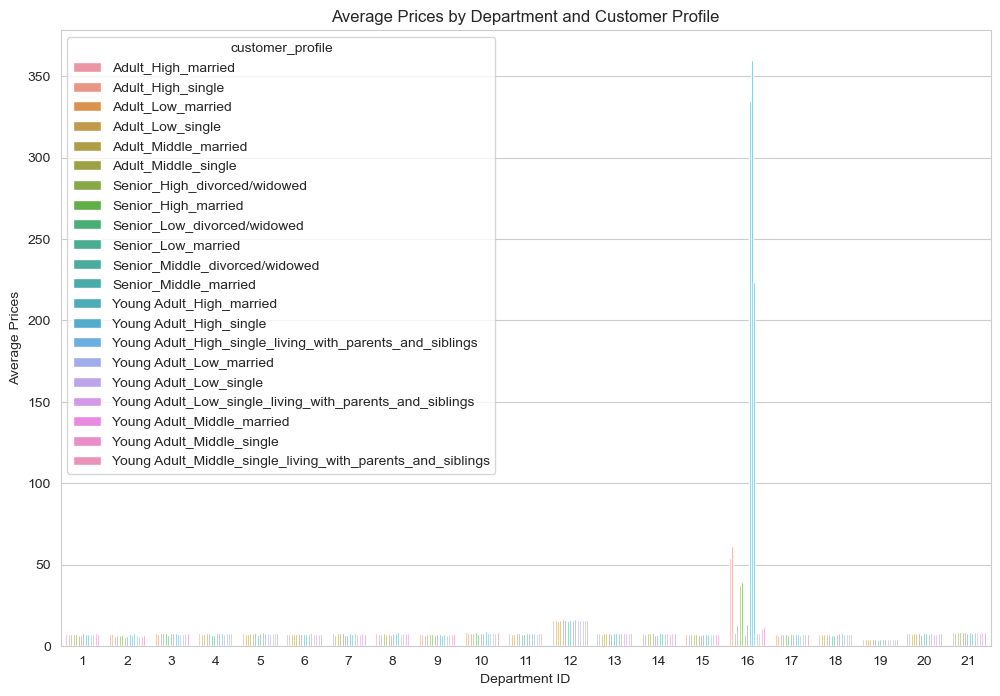

In [56]:

# Group by department_id and customer_profile, calculate the average prices
departmentid_customer_profile_avg = departmentid_customer_profile.groupby(['department_id', 'customer_profile']).mean().reset_index()

# Plotting the bar chart
plt.figure(figsize=(12, 8))
sns.barplot(data=departmentid_customer_profile_avg, x='department_id', y='prices', hue='customer_profile')

# Adding labels and title
plt.xlabel('Department ID')
plt.ylabel('Average Prices')
plt.title('Average Prices by Department and Customer Profile')


# Define the file path to save the pie chart
file_path = r'\Users\inesh\Instacart Basket Analysis_01_02_2024\04 Analysis\Visualizations\departmentid_customer_profile.png'

# Save the pie chart to the specified directory
plt.savefig(file_path)
plt.show()
# Show plot
plt.show()


In [57]:
new_instacart_merge_active_customers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30964564 entries, 0 to 32404854
Data columns (total 34 columns):
 #   Column                 Dtype   
---  ------                 -----   
 0   orders_day_of_week     int64   
 1   order_hour_of_day      int64   
 2   days_from_last_order   float64 
 3   product_id             int64   
 4   product_name           object  
 5   aisle_id               int64   
 6   department_id          int64   
 7   prices                 float64 
 8   merge_indicator        category
 9   price_range_loc        object  
 10  busiest_day            object  
 11  busiest_days           object  
 12  busiest_period_of_day  object  
 13  max_order              int64   
 14  loyalty_flag           object  
 15  average_spending       float64 
 16  spending flag          object  
 17  frequency_of_purchase  float64 
 18  order frequency flag   object  
 19  first_name             object  
 20  last_name              object  
 21  gender                 object  
 2

In [58]:
new_instacart_merge_active_customers['prices'].describe()

count    3.096456e+07
mean     1.193352e+01
std      4.913444e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

In [59]:


# Define the bins for price ranges
price_bins = [0, 5, 10, float('inf')]  # Define your own bins as needed
price_labels = ['Low', 'Medium', 'High']  # Define labels for the price ranges

# Create a new column 'price_range' using pd.cut()
new_instacart_merge_active_customers['price_range_loc'] = pd.cut(new_instacart_merge_active_customers['prices'], bins=price_bins, labels=price_labels, right=False)



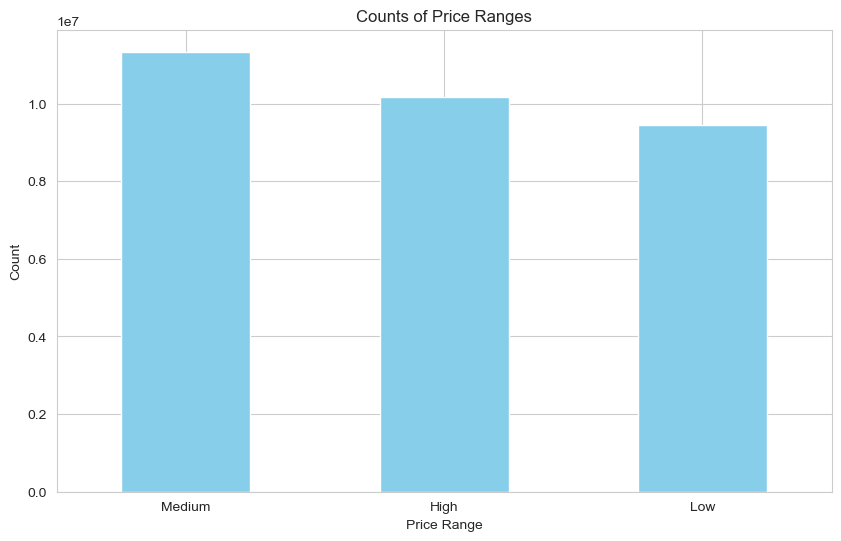

In [61]:

# Calculate the value counts of 'price_range' column
price_range_counts = new_instacart_merge_active_customers['price_range_loc'].value_counts(dropna=False)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
price_range_counts.plot(kind='bar', color='skyblue')

# Adding title and labels
plt.title('Counts of Price Ranges')
plt.xlabel('Price Range')
plt.ylabel('Count')
plt.xticks(rotation=360)

# Define the file path to save the pie chart
file_path = r'\Users\inesh\Instacart Basket Analysis_01_02_2024\04 Analysis\Visualizations\price_range.png'

# Save the pie chart to the specified directory
plt.savefig(file_path)


# Show the plot
plt.show()


In [62]:

new_instacart_merge_active_customers['department_id'].value_counts(dropna=False)

department_id
4     9079273
16    5177182
19    2766406
7     2571901
1     2121731
13    1782705
3     1120828
15    1012074
20    1003834
9      822136
17     699857
12     674781
14     670850
11     424306
18     410392
6      255991
5      144627
8       93060
21      64768
2       34411
10      33451
Name: count, dtype: int64

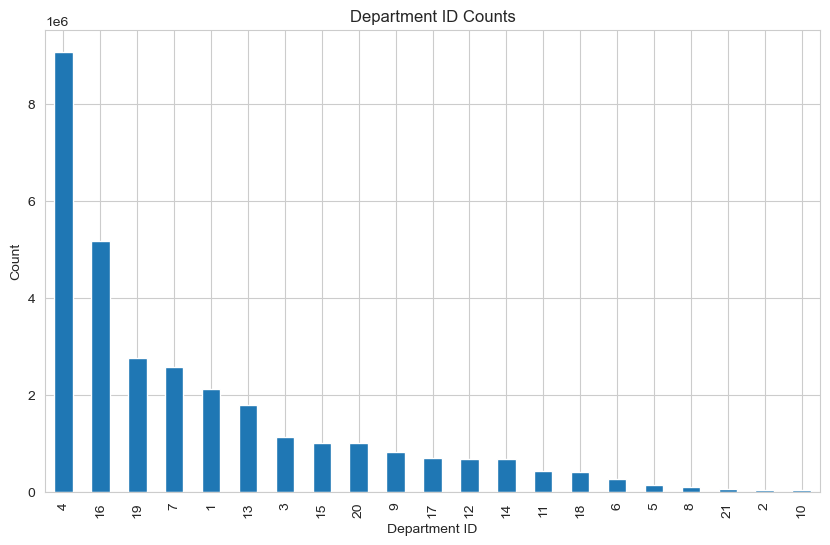

In [63]:
import matplotlib.pyplot as plt

# Plotting the bar chart
new_instacart_merge_active_customers['department_id'].value_counts(dropna=False).plot(kind='bar', figsize=(10, 6))

# Adding labels and title
plt.xlabel('Department ID')
plt.ylabel('Count')
plt.title('Department ID Counts')
# Define the file path to save the pie chart
file_path = r'\Users\inesh\Instacart Basket Analysis_01_02_2024\04 Analysis\Visualizations\products_by_departments.png'

# Save the pie chart to the specified directory
plt.savefig(file_path)
# Displaying the plot
plt.show()


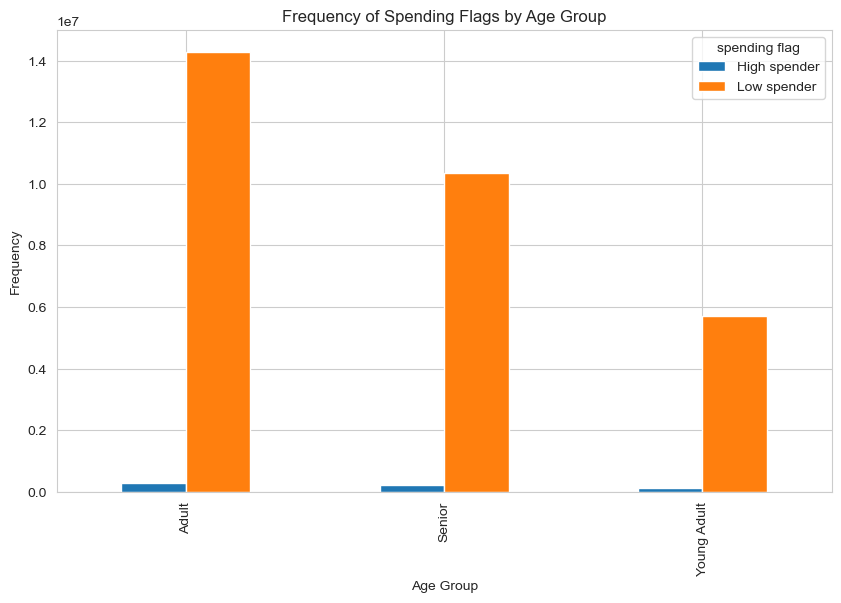

In [64]:
import matplotlib.pyplot as plt

# Calculate the frequency of each spending flag within each age group
spending_flag_counts = new_instacart_merge_active_customers.groupby(['age_flag', 'spending flag']).size().unstack()

# Plotting the bar chart
spending_flag_counts.plot(kind='bar', figsize=(10, 6))

# Adding labels and title
plt.xlabel('Age Group')
plt.ylabel('Frequency')
plt.title('Frequency of Spending Flags by Age Group')

# Define the file path to save the pie chart
file_path = r'\Users\inesh\Instacart Basket Analysis_01_02_2024\04 Analysis\Visualizations\age_spending.png'

# Save the pie chart to the specified directory
plt.savefig(file_path)

# Displaying the plot
plt.show()


#### Export final data set

In [65]:
## Create a sample data set of 

instacart_active_customers =instacart_merge[instacart_merge['exclusion_flag'] == 'Keep']

In [70]:
new_instacart_merge_active_customers.to_pickle(r'C:\Users\inesh\Instacart Basket Analysis_01_02_2024\04 Analysis\Test files\instacart_final_data_set.pkl')

MemoryError: 